In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
base = """
5 2 6 2 3 2 1 2 3 1
1 3 6 7 9 2 4 4 7 1
1 5 8 8 10 17 21 19 9 4
4 18 34 56 17 25 38 17 7 2
1 14 22 43 68 91 62 23 16 7
6 12 21 21 39 87 76 34 4 2
9 24 54 73 88 95 69 16 12 5
3 5 6 40 34 42 6 4 2 5
4 9 16 14 32 51 13 6 6 2
4 2 5 3 3 3 5 3 3 3
"""

# Convert into an array of ints
base = np.array([[int(number) for number in line.split(" ")] for line in base.split("\n") if line != ""])

In [3]:
def show(image):
    # Helper-method to show an image
    return plt.imshow(image, cmap="gray", norm=NoNorm())

### Implementierung des Faltungsoperators, mit Zero-Padding

In [4]:
def convolve(image, kernel):
    # Zero-Padding
    _image = np.pad(image, ((1, 1), (1, 1)), 'constant')

    output_image = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        # Cut out the part of the image which we consider for this iteration...
        window = _image[x:x+3, y:y+3] # image[x-1:x+2, y-1:y+2] but x=x+1, y=y+1 because of pad
        
        # ... and multiply it element-wise with the kernel, and sum up everything afterwards.
        output_image[x, y] = np.sum(np.multiply(window, kernel))

    return output_image

### Implementierung der Grauwertspeizung
(Quelle: http://home.in.tum.de/~perzylo/Proseminar/Punktoperatoren.pdf)

In [5]:
def spread_gray_value(image, g_1=None, g_2=None, G=255):
    if g_1 is None:
        g_1 = np.min(image)
    if g_2 is None:
        g_2 = np.max(image)

    output = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        if value < g_1:
            output[x, y] = 0
        elif value > g_2:
            output[x, y] = G - 1
        else:
            output[x, y] = (G - 1)*(value - g_1)/(g_2 - g_1)
    return output

In [6]:
base_spread = spread_gray_value(base)

# 1) Mittelwertfilter

In [14]:
average_kernel = np.ones((3,3)) * 1/9
base_averaged = convolve(base, average_kernel)
base_averaged_spread = spread_gray_value(base_averaged)

base, base_averaged

(array([[ 5,  2,  6,  2,  3,  2,  1,  2,  3,  1],
        [ 1,  3,  6,  7,  9,  2,  4,  4,  7,  1],
        [ 1,  5,  8,  8, 10, 17, 21, 19,  9,  4],
        [ 4, 18, 34, 56, 17, 25, 38, 17,  7,  2],
        [ 1, 14, 22, 43, 68, 91, 62, 23, 16,  7],
        [ 6, 12, 21, 21, 39, 87, 76, 34,  4,  2],
        [ 9, 24, 54, 73, 88, 95, 69, 16, 12,  5],
        [ 3,  5,  6, 40, 34, 42,  6,  4,  2,  5],
        [ 4,  9, 16, 14, 32, 51, 13,  6,  6,  2],
        [ 4,  2,  5,  3,  3,  3,  5,  3,  3,  3]]),
 array([[ 1,  2,  2,  3,  2,  2,  1,  2,  2,  1],
        [ 1,  4,  5,  6,  6,  7,  8,  7,  5,  2],
        [ 3,  8, 16, 17, 16, 15, 16, 14,  7,  3],
        [ 4, 11, 23, 29, 37, 38, 34, 23, 11,  5],
        [ 6, 14, 26, 35, 49, 55, 50, 30, 12,  4],
        [ 7, 18, 31, 47, 67, 75, 61, 34, 13,  5],
        [ 6, 15, 28, 41, 57, 59, 47, 24,  9,  3],
        [ 6, 14, 26, 39, 52, 47, 33, 14,  6,  3],
        [ 3,  6, 11, 17, 24, 21, 14,  5,  3,  2],
        [ 2,  4,  5,  8, 11, 11,  9,  4,  2,  1]

# 2) Sobel-Operatoren

### Sobel-Operator in x-Richtung

In [8]:
S_x = 0.25 * np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

x = convolve(base, S_x)
x_spread = spread_gray_value(x)
x, x_spread

(array([[  1,   1,   1,   0,  -1,  -2,   0,   1,  -1,  -3],
        [  3,   4,   2,   1,   0,   0,   1,  -1,  -5,  -6],
        [  7,  12,  12,  -2,  -4,   9,   0, -13, -12,  -8],
        [ 13,  22,  27,   3,  -1,  11, -20, -30, -15,  -9],
        [ 14,  21,  26,  23,  32,  11, -49, -48, -19, -10],
        [ 15,  24,  24,  29,  50,  12, -63, -61, -22,  -9],
        [ 16,  27,  35,  28,  28,  -7, -62, -47, -13,  -7],
        [ 10,  15,  31,  26,  15, -23, -50, -18,  -3,  -5],
        [  6,   7,  11,  14,  19, -16, -32,  -5,  -1,  -4],
        [  3,   3,   1,   3,   9,  -3, -11,  -2,  -1,  -3]]),
 array([[143, 143, 143, 141, 139, 137, 141, 143, 139, 134],
        [148, 150, 146, 143, 141, 141, 143, 139, 130, 128],
        [157, 168, 168, 137, 132, 161, 141, 112, 114, 123],
        [170, 191, 202, 148, 139, 166,  96,  74, 107, 121],
        [173, 188, 200, 193, 213, 166,  31,  33,  98, 119],
        [175, 195, 195, 206, 254, 168,   0,   4,  92, 121],
        [177, 202, 220, 204, 204, 125,

### Sobel-Operator in y-Richtung

In [9]:
S_y = 0.25 * np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

y = convolve(base, S_y)
y_spread = spread_gray_value(y)
y, y_spread

(array([[ -1,  -3,  -5,  -7,  -6,  -4,  -3,  -4,  -4,  -2],
        [  1,  -1,  -3,  -5,  -8, -14, -18, -15,  -8,  -3],
        [ -5, -15, -30, -33, -22, -22, -26, -15,  -3,   0],
        [ -2,  -8, -18, -35, -56, -61, -40, -14,  -5,  -3],
        [  0,   5,  16,  15, -17, -46, -38, -17,  -2,   0],
        [ -6, -15, -26, -28, -18,  -8,  -2,   2,   4,   2],
        [  3,   8,   4,  -4,   9,  41,  53,  33,   7,  -1],
        [  6,  18,  37,  53,  53,  50,  41,  20,   6,   3],
        [  0,   1,  10,  26,  34,  27,  10,   0,   0,   0],
        [  4,   9,  13,  19,  32,  36,  20,   7,   5,   2]]),
 array([[133, 129, 124, 120, 122, 127, 129, 127, 127, 131],
        [138, 133, 129, 124, 118, 104,  95, 102, 118, 129],
        [124, 102,  69,  62,  86,  86,  77, 102, 129, 135],
        [131, 118,  95,  57,  11,   0,  46, 104, 124, 129],
        [135, 147, 171, 169,  98,  33,  51,  98, 131, 135],
        [122, 102,  77,  73,  95, 118, 131, 140, 144, 140],
        [142, 153, 144, 127, 155, 227,

# 3) Berechnung der Kanten (Sobel-Operator-Max)

In [10]:
g = np.maximum(x, y)
g_spread = spread_gray_value(g)
g, g_spread

(array([[  1,   1,   1,   0,  -1,  -2,   0,   1,  -1,  -2],
        [  3,   4,   2,   1,   0,   0,   1,  -1,  -5,  -3],
        [  7,  12,  12,  -2,  -4,   9,   0, -13,  -3,   0],
        [ 13,  22,  27,   3,  -1,  11, -20, -14,  -5,  -3],
        [ 14,  21,  26,  23,  32,  11, -38, -17,  -2,   0],
        [ 15,  24,  24,  29,  50,  12,  -2,   2,   4,   2],
        [ 16,  27,  35,  28,  28,  41,  53,  33,   7,  -1],
        [ 10,  18,  37,  53,  53,  50,  41,  20,   6,   3],
        [  6,   7,  11,  26,  34,  27,  10,   0,   0,   0],
        [  4,   9,  13,  19,  32,  36,  20,   7,   5,   2]]),
 array([[108, 108, 108, 106, 103, 100, 106, 108, 103, 100],
        [114, 117, 111, 108, 106, 106, 108, 103,  92,  97],
        [125, 139, 139, 100,  94, 131, 106,  69,  97, 106],
        [142, 167, 181, 114, 103, 136,  50,  66,  92,  97],
        [145, 164, 178, 170, 195, 136,   0,  58, 100, 106],
        [147, 173, 173, 187, 245, 139, 100, 111, 117, 111],
        [150, 181, 203, 184, 184, 220,

# 4) Darstellungen der einzelnen Schritte

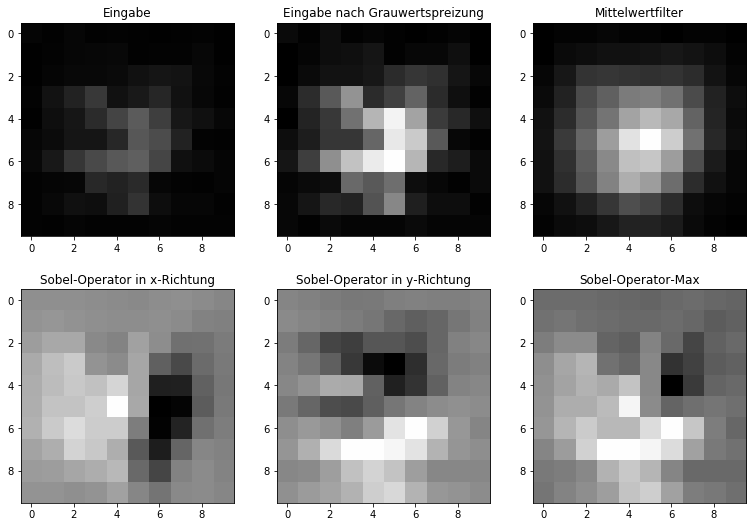

In [12]:
fig = plt.figure(figsize=(13, 9))

rows = 2
columns = 3

in_ = fig.add_subplot(rows, columns, 1)
in_.set_title("Eingabe")
show(base)

in_spread = fig.add_subplot(rows, columns, 2)
in_spread.set_title("Eingabe nach Grauwertspreizung")
show(base_spread)

avg = fig.add_subplot(rows, columns, 3)
avg.set_title("Mittelwertfilter")
show(base_averaged_spread)

x_plt = fig.add_subplot(rows, columns, 4)
x_plt.set_title("Sobel-Operator in x-Richtung")
show(x_spread)

y_plt = fig.add_subplot(rows, columns, 5)
y_plt.set_title("Sobel-Operator in y-Richtung")
show(y_spread)

g_plt = fig.add_subplot(rows, columns, 6)
g_plt.set_title("Sobel-Operator-Max")
show(g_spread)

plt.show()